# import the module

In [11]:
import pandas as pd
import os
import numpy as np

from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import KFold

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

os.chdir("D:/WorkPath/PycharmProjects/MutTm-pred")
from Dataset.Process4Dataset.DatasetCeator4PonDT import Dataset4MutTm
from MachineLearning.Util import train_validation_test

# 1. Subtraction 

In [12]:
dataset_sub = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=200,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="sub")

sub_train_feature = np.array(dataset_sub.train_feature_set)
sub_train_label = np.array(dataset_sub.train_label_set).ravel()
sub_test_feature = np.array(dataset_sub.test_feature_set)
sub_test_leabel = np.array(dataset_sub.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了2989条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条379个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了137条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条10个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 213/213 [00:00<00:00, 9681.89it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 141709
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1152
[LightGBM] [Info] Start training from score -2.004381
Time for Training: 0.626328706741333
[LightGBM] [Info] Total Bins 134412
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.049294
[LightGBM] [Info] Total Bins 135319
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.019805
[LightGBM] [Info] Total Bins 133134
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1147
[LightGBM] [Info] Start training from score -1.971033
[LightGBM] [Info] Total Bins 135026
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.050462
[LightGBM] [Info] Tota

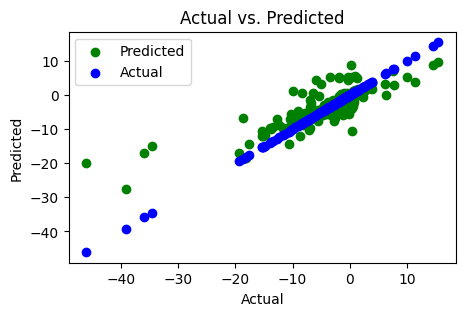

In [13]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      sub_train_feature,
                      sub_train_label,
                      sub_test_feature,
                      sub_test_leabel)

Starting Training...
Time for Training: 2.0291683673858643
The Result for CV:
MAE:2.0299
PCC:0.8807
R2:0.7735
RMSE:3.6016
Time for CV:9.506058931350708
Starting Testing...
The Result for Testing:MAE:3.9726
PCC:0.7429
R2:0.4753
RMSE:5.2459
Time for Testing:0.00400090217590332


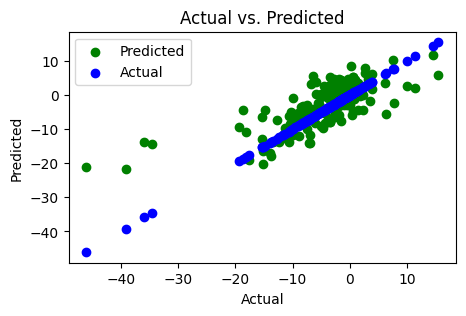

In [14]:
init_xgb_trainer = XGBRegressor()
train_validation_test(init_xgb_trainer,
                      sub_train_feature,
                      sub_train_label,
                      sub_test_feature,
                      sub_test_leabel)

# 2. Addition

In [15]:
dataset_add = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=200,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="add")

add_train_feature = np.array(dataset_add.train_feature_set)
add_train_label = np.array(dataset_add.train_label_set).ravel()
add_test_feature = np.array(dataset_add.test_feature_set)
add_test_leabel = np.array(dataset_add.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了2989条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条379个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了137条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条10个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 213/213 [00:00<00:00, 9681.79it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 141809
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1152
[LightGBM] [Info] Start training from score -2.004381
Time for Training: 0.5770165920257568
[LightGBM] [Info] Total Bins 134291
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.049294
[LightGBM] [Info] Total Bins 135052
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.019805
[LightGBM] [Info] Total Bins 132915
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1147
[LightGBM] [Info] Start training from score -1.971033
[LightGBM] [Info] Total Bins 134731
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1149
[LightGBM] [Info] Start training from score -2.050462
[LightGBM] [Info] Tot

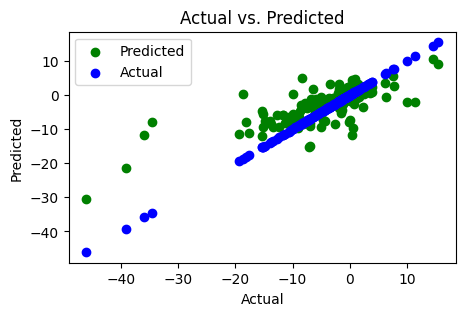

In [16]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      add_train_feature,
                      add_train_label,
                      add_test_feature,
                      add_test_leabel)

Starting Training...
Time for Training: 1.8556263446807861
The Result for CV:
MAE:2.0261
PCC:0.8826
R2:0.7780
RMSE:3.5778
Time for CV:8.92262887954712
Starting Testing...
The Result for Testing:MAE:3.2485
PCC:0.8171
R2:0.5581
RMSE:4.8142
Time for Testing:0.0038008689880371094


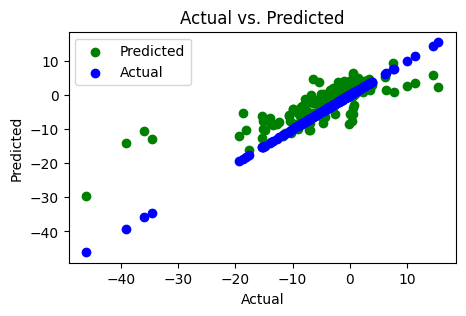

In [17]:
train_validation_test(XGBRegressor(),
                      add_train_feature,
                      add_train_label,
                      add_test_feature,
                      add_test_leabel)

# 3. Concatenation

In [18]:
dataset_cat= Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=200,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="cat")

cat_train_feature = np.array(dataset_cat.train_feature_set)
cat_train_label = np.array(dataset_cat.train_label_set).ravel()
cat_test_feature = np.array(dataset_cat.test_feature_set)
cat_test_leabel = np.array(dataset_cat.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了2989条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条379个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了137条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条10个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 213/213 [00:00<00:00, 9681.89it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
[LightGBM] [Info] Total Bins 176088
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1352
[LightGBM] [Info] Start training from score -2.004381
Time for Training: 0.7169618606567383
[LightGBM] [Info] Total Bins 165857
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1349
[LightGBM] [Info] Start training from score -2.049294
[LightGBM] [Info] Total Bins 166604
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1349
[LightGBM] [Info] Start training from score -2.019805
[LightGBM] [Info] Total Bins 164008
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1347
[LightGBM] [Info] Start training from score -1.971033
[LightGBM] [Info] Total Bins 165956
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1349
[LightGBM] [Info] Start training from score -2.050462
[LightGBM] [Info] Tot

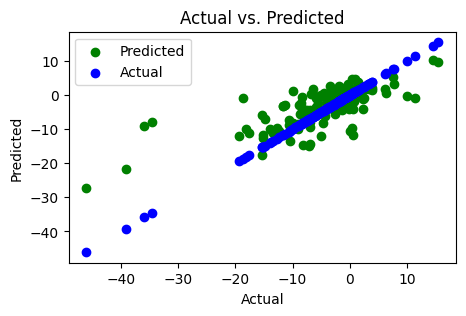

In [19]:
train_validation_test(LGBMRegressor(force_col_wise=True),
                      cat_train_feature,
                      cat_train_label,
                      cat_test_feature,
                      cat_test_leabel)

Starting Training...
Time for Training: 2.624067783355713
The Result for CV:
MAE:2.0139
PCC:0.8814
R2:0.7757
RMSE:3.5981
Time for CV:11.544209241867065
Starting Testing...
The Result for Testing:MAE:3.5761
PCC:0.7173
R2:0.4472
RMSE:5.3846
Time for Testing:0.0039997100830078125


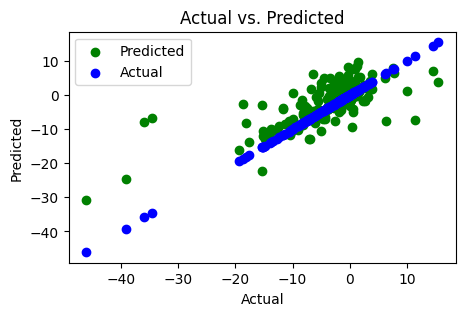

In [20]:
train_validation_test(XGBRegressor(),
                      cat_train_feature,
                      cat_train_label,
                      cat_test_feature,
                      cat_test_leabel)